## Neural Network를 통한 이미지 분류

In [63]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'AppleGothic'

In [30]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train:np.ndarray = x_train
y_train:np.ndarray = y_train
x_test:np.ndarray = x_test
y_test:np.ndarray = y_test

# 60000만장 28*28의 흑백 이미지
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [12]:
print(pd.Series(y_train).value_counts().sort_index())
print(pd.Series(y_test).value_counts().sort_index())

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64
0     980
1    1135
2    1032
3    1010
4     982
5     892
6     958
7    1028
8     974
9    1009
Name: count, dtype: int64


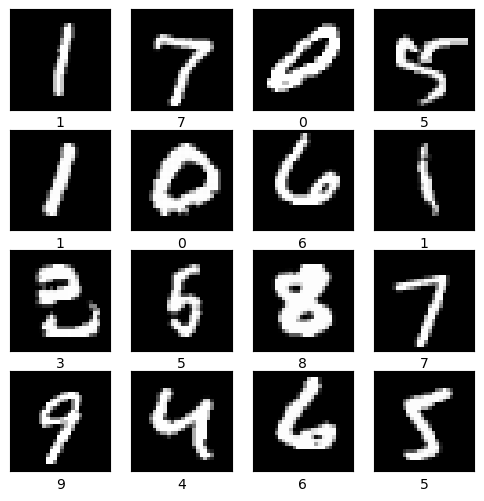

In [22]:
## 이미지 확인

samples = np.random.randint(60000, size=16)
plt.figure(figsize=(6, 6))
for i, idx in enumerate(samples):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[idx], cmap='gray')
    plt.xlabel(y_train[idx])

In [31]:
# validation set 분리

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=.2, random_state=777)

x_train:np.ndarray = x_train
y_train:np.ndarray = y_train
x_val:np.ndarray = x_val
y_val:np.ndarray = y_val

print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(48000, 28, 28) (12000, 28, 28) (48000,) (12000,)


In [33]:
# 정규화
# 0 ~ 255 -> 0 ~ 1
# MinMaxScaler를 사용하면 0 ~ 1로 정규화 가능 (min(x) 값이 0이고 max(x) 값이 255)

x_train_s = x_train.astype(np.float32) / 255.
x_val_s = x_val.astype(np.float32) / 255.
x_test_s = x_test.astype(np.float32) / 255.

print(x_train_s.max(), x_train_s.min())
print(x_train_s)



1.0 0.0
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [39]:
# label -> one-hot encoding

from keras.utils import to_categorical

y_train_o = to_categorical(y_train)
y_val_o = to_categorical(y_val)
y_test_o = to_categorical(y_test)

print(y_train_o.shape, y_val_o.shape, y_test_o.shape)
print(y_train_o[0])

(48000, 10) (12000, 10) (10000, 10)
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [45]:
# neural network에 입력하기 위해 flatten (이미지를 1차원으로 펼침)
x_train_s = x_train_s.reshape(-1, 28*28)
x_val_s = x_val_s.reshape(-1, 28*28)
x_test_s = x_test_s.reshape(-1, 28*28)

print(x_train_s.shape, x_val_s.shape, x_test_s.shape)

(48000, 784) (12000, 784) (10000, 784)


In [51]:
# 모델 생성

from keras import layers

model = keras.Sequential(
    [
        layers.Dense(512, activation='relu', input_shape=(28*28,)),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
_________________________________________________________________


In [52]:
# 모델 학습
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
EPOCHS = 20
BATCH_SIZE = 128

history = model.fit(
    x_train_s, y_train_o,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(x_val_s, y_val_o), # validation set을 사용하여 학습 과정을 모니터링
    verbose=1 # 학습 과정을 보여줌 (0: 보여주지 않음, 1: 보여줌)
)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2675 - accuracy: 0.9220 - val_loss: 0.1229 - val_accuracy: 0.9627
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0953 - accuracy: 0.9704 - val_loss: 0.1045 - val_accuracy: 0.9674
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0620 - accuracy: 0.9809 - val_loss: 0.0898 - val_accuracy: 0.9735
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0455 - accuracy: 0.9855 - val_loss: 0.0829 - val_accuracy: 0.9778
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0363 - accuracy: 0.9885 - val_loss: 0.0867 - val_accuracy: 0.9758
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0298 - accuracy: 0.9901 - val_loss: 0.0904 - val_accuracy: 0.9745
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0250 - accuracy: 0.9920 - val_loss: 0.0953 - val_accuracy: 0.9740
Epoch 

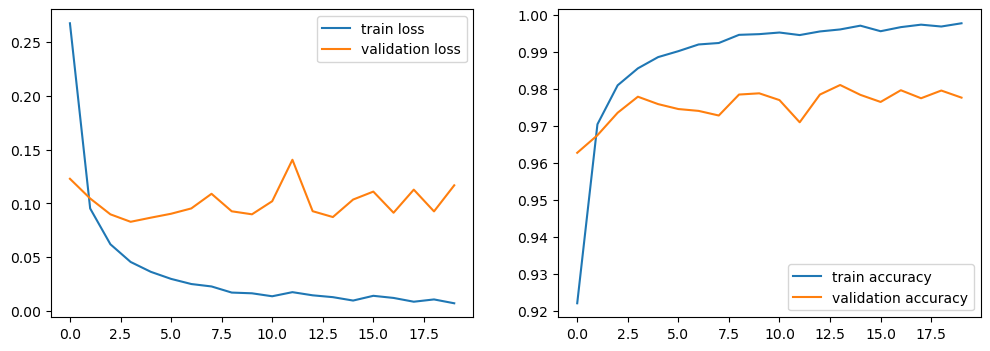

In [54]:
# 학습 과정 시각화

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(EPOCHS), history.history['val_loss'], label='validation loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), history.history['accuracy'], label='train accuracy')
plt.plot(range(EPOCHS), history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [58]:
## 모델 평가

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(x_test_s)
y_pred = np.argmax(y_pred, axis=1)

print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred, average='macro'))
print('recall:', recall_score(y_test, y_pred, average='macro'))
print('f1:', f1_score(y_test, y_pred, average='macro'))


313/313 [==============================] - 0s 1ms/step
accuracy: 0.9786
precision: 0.9783608265138616
recall: 0.9784550291690216
f1: 0.9783577928943273


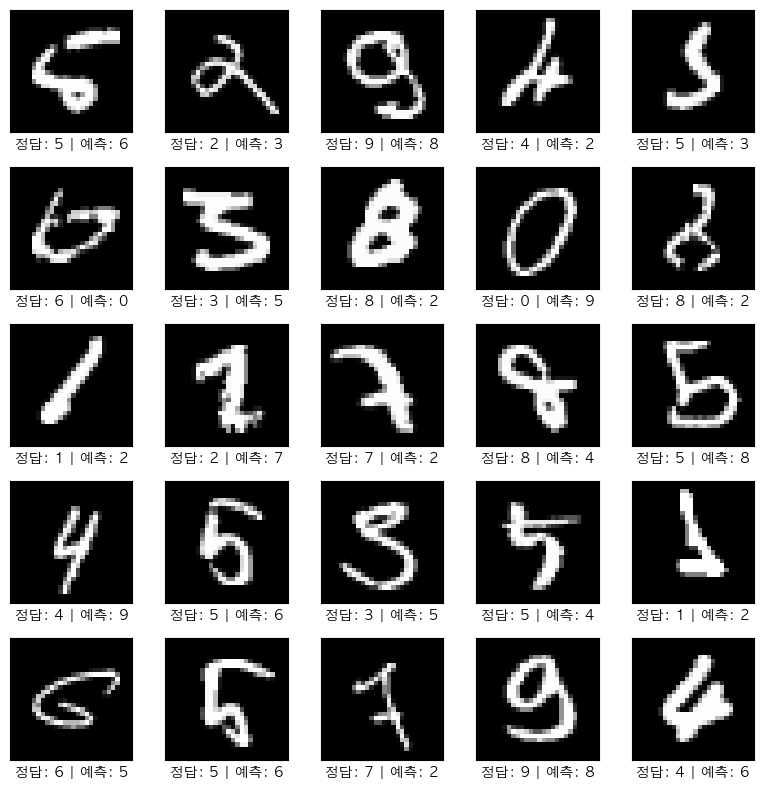

In [74]:
# 오답 이미지 확인

incorrect_imgs = x_test[y_test != y_pred][:25]

plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(incorrect_imgs[i], cmap='gray')
    plt.xlabel(f"정답: {y_test[y_test != y_pred][i]} | 예측: {y_pred[y_test != y_pred][i]}")

plt.subplots_adjust(left=0.2, right=0.8, wspace=0, hspace=0.5)
plt.tight_layout()



## 모델 저장

1. tensorflow 형식으로 저장 -> 모델의 구조와 가중치를 따로 저장
2. keras 형식으로 저장 -> 모델의 구조와 가중치를 한 번에 저장

In [76]:
model.save('models/mnist_nn__28x28__97.keras') # keras 방식

In [77]:
model.save('models/mnist_nn__28x28__97') # tensorflow 방식

INFO:tensorflow:Assets written to: models/mnist_nn__28x28__97/assets


## 모델 로딩

In [78]:
from keras.models import load_model

loaded_model:keras.Sequential = load_model('models/mnist_nn__28x28__97.keras')
loaded_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
_________________________________________________________________


In [79]:
y_pred = loaded_model.predict(x_test_s)
y_pred = np.argmax(y_pred, axis=1)

print('accuracy:', accuracy_score(y_test, y_pred))

313/313 [==============================] - 0s 752us/step
accuracy: 0.9786
